In [260]:
import pandas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

In [261]:
df=pd.read_csv("https://raw.githubusercontent.com/dsrscientist/dataset1/master/titanic_train.csv")
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [262]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [263]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [264]:
df.drop(['PassengerId','Name',],axis=1,inplace=True)



In [265]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,NaN,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [266]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [267]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='most_frequent')
df['Cabin']=imp.fit_transform(df['Cabin'].values.reshape(-1,1))
df['Embarked']=imp.fit_transform(df['Embarked'].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.0,1,0,113803,53.1000,C123,S
4,0,3,male,35.0,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,B96 B98,S
887,1,1,female,19.0,0,0,112053,30.0000,B42,S
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,male,26.0,0,0,111369,30.0000,C148,C


In [268]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin         0
Embarked      0
dtype: int64

In [269]:
import numpy as np
from sklearn.impute import SimpleImputer
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
df['Age']=imp.fit_transform(df['Age'].values.reshape(-1,1))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,male,22.000000,1,0,A/5 21171,7.2500,B96 B98,S
1,1,1,female,38.000000,1,0,PC 17599,71.2833,C85,C
2,1,3,female,26.000000,0,0,STON/O2. 3101282,7.9250,B96 B98,S
3,1,1,female,35.000000,1,0,113803,53.1000,C123,S
4,0,3,male,35.000000,0,0,373450,8.0500,B96 B98,S
...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.000000,0,0,211536,13.0000,B96 B98,S
887,1,1,female,19.000000,0,0,112053,30.0000,B42,S
888,0,3,female,29.699118,1,2,W./C. 6607,23.4500,B96 B98,S
889,1,1,male,26.000000,0,0,111369,30.0000,C148,C


In [270]:
df.isnull().sum().sum()

0

In [271]:
le=LabelEncoder()
list1=['Sex','Cabin','Embarked']
for i in list1:
    df[i]=le.fit_transform(df[i].astype(str))
df                      

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,A/5 21171,7.2500,47,2
1,1,1,0,38.000000,1,0,PC 17599,71.2833,81,0
2,1,3,0,26.000000,0,0,STON/O2. 3101282,7.9250,47,2
3,1,1,0,35.000000,1,0,113803,53.1000,55,2
4,0,3,1,35.000000,0,0,373450,8.0500,47,2
...,...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,211536,13.0000,47,2
887,1,1,0,19.000000,0,0,112053,30.0000,30,2
888,0,3,0,29.699118,1,2,W./C. 6607,23.4500,47,2
889,1,1,1,26.000000,0,0,111369,30.0000,60,0


In [272]:
df.drop(['Ticket'],axis=1,inplace=True)

In [273]:
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,47,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,47,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,47,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


In [275]:
df.isnull().sum().sum()

0

# EDA

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

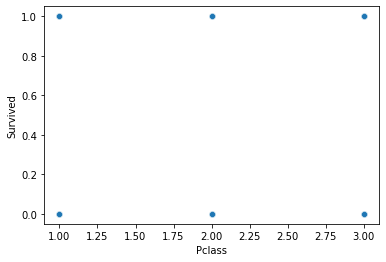

In [276]:
sns.scatterplot(x='Pclass',y='Survived',data=df)

<AxesSubplot:xlabel='Age', ylabel='Survived'>

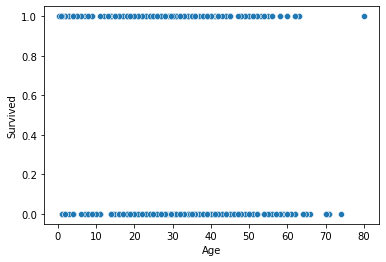

In [277]:
sns.scatterplot(x='Age',y='Survived',data=df)

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

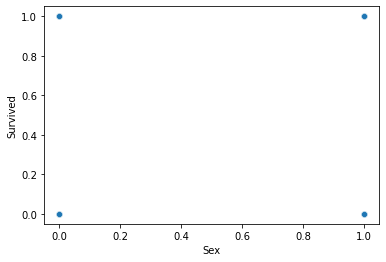

In [278]:
sns.scatterplot(x='Sex',y='Survived',data=df)

<AxesSubplot:xlabel='SibSp', ylabel='Survived'>

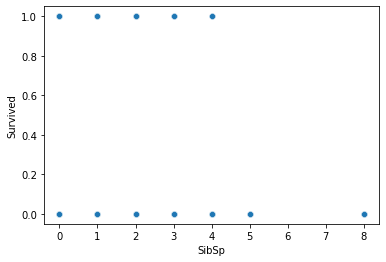

In [279]:
sns.scatterplot(x='SibSp',y='Survived',data=df)

<AxesSubplot:xlabel='Parch', ylabel='Survived'>

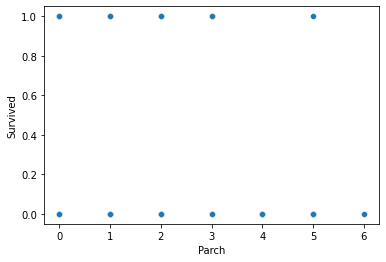

In [280]:
sns.scatterplot(x='Parch',y='Survived',data=df)

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

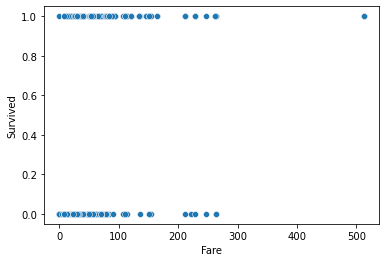

In [281]:
sns.scatterplot(x='Fare',y='Survived',data=df)

<AxesSubplot:xlabel='Cabin', ylabel='Survived'>

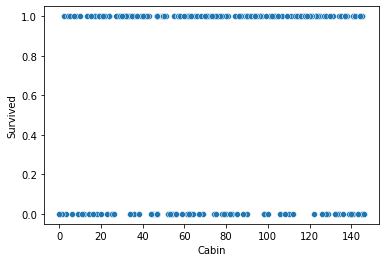

In [282]:
sns.scatterplot(x='Cabin',y='Survived',data=df)

<AxesSubplot:xlabel='Embarked', ylabel='Survived'>

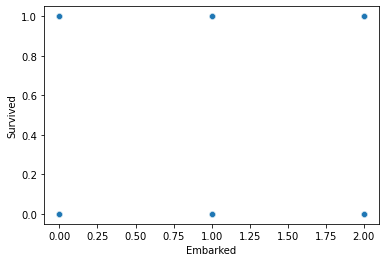

In [283]:
sns.scatterplot(x='Embarked',y='Survived',data=df)

In [284]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Cabin',
       'Embarked'],
      dtype='object')

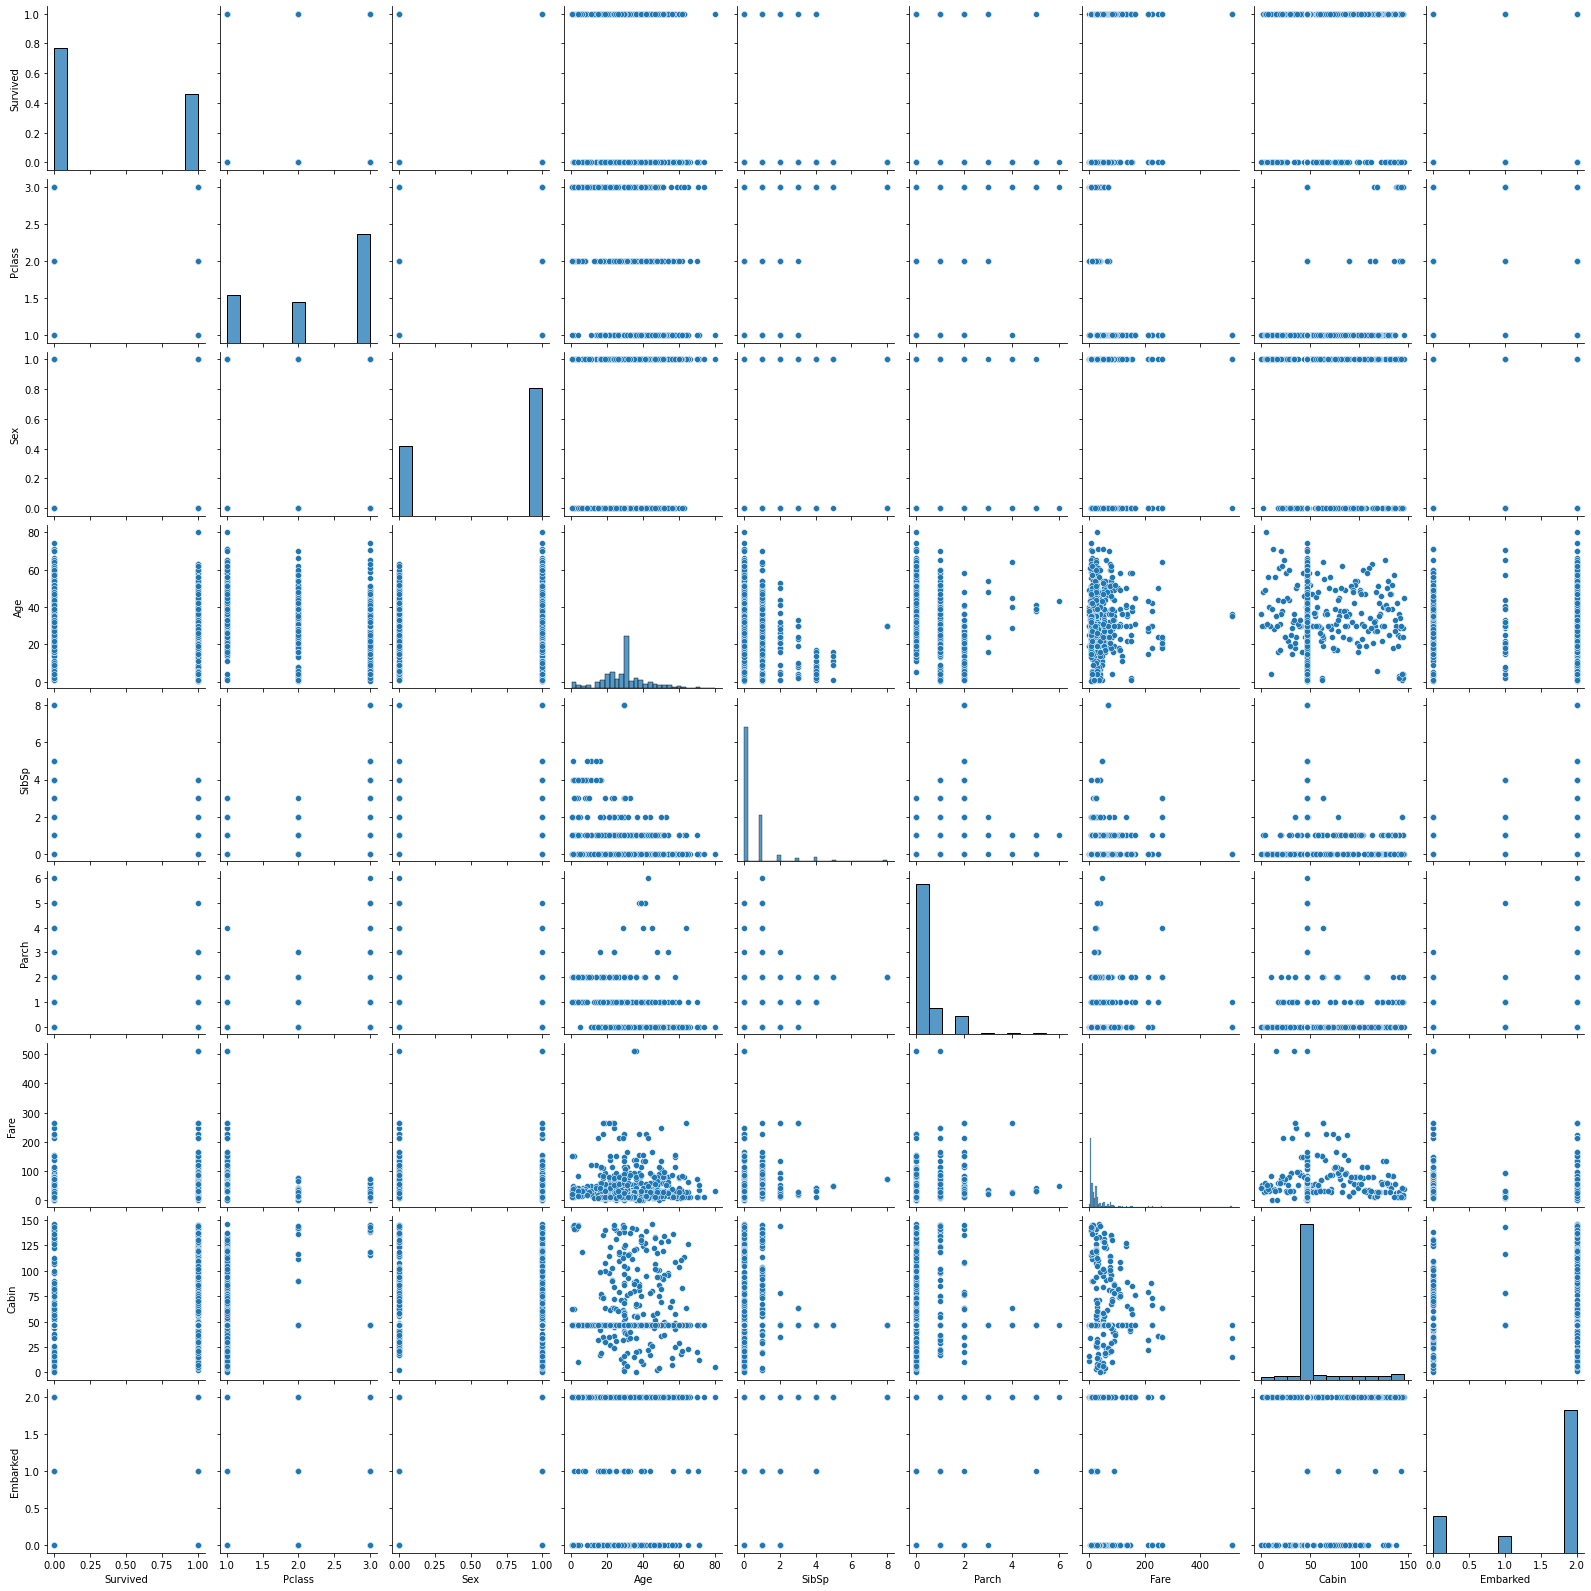

In [285]:
sns.pairplot(df)

array([[<AxesSubplot:title={'center':'Survived'}>,
        <AxesSubplot:title={'center':'Pclass'}>,
        <AxesSubplot:title={'center':'Sex'}>],
       [<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'SibSp'}>,
        <AxesSubplot:title={'center':'Parch'}>],
       [<AxesSubplot:title={'center':'Fare'}>,
        <AxesSubplot:title={'center':'Cabin'}>,
        <AxesSubplot:title={'center':'Embarked'}>]], dtype=object)

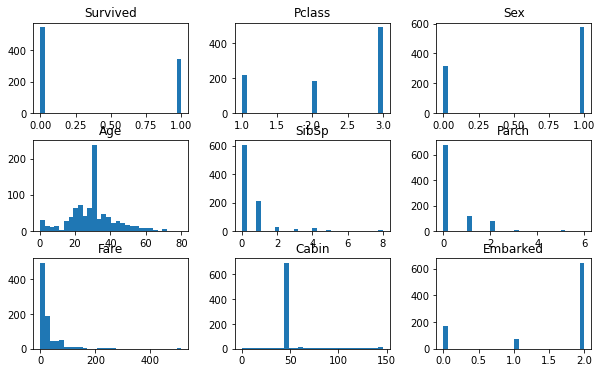

In [286]:
df.hist(grid=False,
       figsize=(10, 6),
       bins=30)

In [287]:
df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,0.175690,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,-0.248495,0.162098
Sex,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,-0.102643,0.108262
Age,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,0.056011,-0.026749
SibSp,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,-0.005539,0.068230
Parch,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.022682,0.039798
Fare,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,0.090516,-0.224719
Cabin,0.175690,-0.248495,-0.102643,0.056011,-0.005539,0.022682,0.090516,1.000000,0.023804
Embarked,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,0.023804,1.000000


<AxesSubplot:>

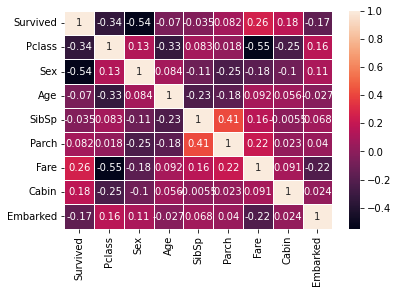

In [288]:
sns.heatmap(df.corr(),annot=True,linewidth=0.5)

In [289]:
df.corr()['Survived'].sort_values()

Sex        -0.543351
Pclass     -0.338481
Embarked   -0.167675
Age        -0.069809
SibSp      -0.035322
Parch       0.081629
Cabin       0.175690
Fare        0.257307
Survived    1.000000
Name: Survived, dtype: float64

In [290]:
df.drop(['Sex','Pclass'],axis=1)

,Survived,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,22.000000,1,0,7.2500,47,2
1,1,38.000000,1,0,71.2833,81,0
2,1,26.000000,0,0,7.9250,47,2
3,1,35.000000,1,0,53.1000,55,2
4,0,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...
886,0,27.000000,0,0,13.0000,47,2
887,1,19.000000,0,0,30.0000,30,2
888,0,29.699118,1,2,23.4500,47,2
889,1,26.000000,0,0,30.0000,60,0


In [291]:
df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,53.639731,1.536476
std,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429,23.568293,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,47.000000,1.000000
50%,0.000000,3.000000,1.000000,29.699118,0.000000,0.000000,14.454200,47.000000,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,47.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,146.000000,2.000000


In [292]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int32  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Cabin     891 non-null    int32  
 8   Embarked  891 non-null    int32  
dtypes: float64(2), int32(3), int64(4)
memory usage: 52.3 KB


Survived       AxesSubplot(0.125,0.657941;0.0731132x0.222059)
Pclass      AxesSubplot(0.212736,0.657941;0.0731132x0.222059)
Sex         AxesSubplot(0.300472,0.657941;0.0731132x0.222059)
Age         AxesSubplot(0.388208,0.657941;0.0731132x0.222059)
SibSp       AxesSubplot(0.475943,0.657941;0.0731132x0.222059)
Parch       AxesSubplot(0.563679,0.657941;0.0731132x0.222059)
Fare        AxesSubplot(0.651415,0.657941;0.0731132x0.222059)
Cabin       AxesSubplot(0.739151,0.657941;0.0731132x0.222059)
Embarked    AxesSubplot(0.826887,0.657941;0.0731132x0.222059)
dtype: object

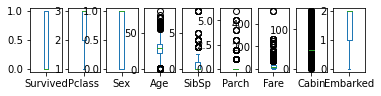

In [293]:
df.plot(kind='box',subplots=True,layout=(3,9))

In [294]:
df.skew()

Survived    0.478523
Pclass     -0.630548
Sex        -0.618921
Age         0.434488
SibSp       3.695352
Parch       2.749117
Fare        4.787317
Cabin       2.268926
Embarked   -1.264823
dtype: float64

In [295]:
from scipy.stats import zscore
z=np.abs(zscore(df))
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,47,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,47,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,47,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [296]:
threshold=3
print(np.where(z>3))

(array([  6,  10,  13,  16,  25,  27,  50,  59,  66,  68,  71,  75,  86,
        88,  96, 116, 118, 119, 128, 148, 159, 164, 167, 171, 180, 182,
       183, 193, 201, 205, 233, 251, 258, 261, 262, 266, 278, 299, 309,
       311, 324, 337, 339, 340, 341, 345, 360, 370, 377, 380, 386, 394,
       434, 437, 438, 438, 456, 462, 480, 493, 516, 527, 541, 542, 557,
       558, 567, 577, 585, 610, 618, 630, 638, 662, 672, 678, 679, 683,
       686, 689, 699, 700, 715, 716, 724, 730, 736, 737, 742, 745, 772,
       774, 776, 779, 787, 792, 809, 813, 824, 835, 846, 850, 851, 858,
       863, 885], dtype=int64), array([7, 7, 5, 4, 5, 6, 4, 4, 7, 4, 4, 7, 5, 6, 3, 3, 6, 4, 7, 7, 4, 4,
       5, 4, 4, 4, 7, 7, 4, 7, 4, 7, 6, 4, 7, 4, 4, 6, 7, 6, 4, 7, 7, 7,
       6, 7, 5, 7, 6, 6, 4, 7, 7, 5, 5, 6, 7, 7, 4, 3, 7, 6, 4, 4, 6, 7,
       5, 7, 7, 5, 7, 3, 5, 7, 3, 5, 6, 4, 4, 6, 7, 6, 7, 6, 7, 6, 5, 6,
       6, 3, 7, 5, 7, 6, 4, 4, 7, 4, 4, 7, 4, 4, 3, 5, 4, 5], dtype=int64))


In [297]:
df_new=df[(z<3).all(axis=1)]
df_new

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,3,1,22.000000,1,0,7.2500,47,2
1,1,1,0,38.000000,1,0,71.2833,81,0
2,1,3,0,26.000000,0,0,7.9250,47,2
3,1,1,0,35.000000,1,0,53.1000,55,2
4,0,3,1,35.000000,0,0,8.0500,47,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,47,2
887,1,1,0,19.000000,0,0,30.0000,30,2
888,0,3,0,29.699118,1,2,23.4500,47,2
889,1,1,1,26.000000,0,0,30.0000,60,0


In [298]:
df.shape

(891, 9)

In [299]:
df_new.shape

(786, 9)

In [300]:
x=df_new.iloc[:,-8:-1]
x

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin
0,3,1,22.000000,1,0,7.2500,47
1,1,0,38.000000,1,0,71.2833,81
2,3,0,26.000000,0,0,7.9250,47
3,1,0,35.000000,1,0,53.1000,55
4,3,1,35.000000,0,0,8.0500,47
...,...,...,...,...,...,...,...
886,2,1,27.000000,0,0,13.0000,47
887,1,0,19.000000,0,0,30.0000,30
888,3,0,29.699118,1,2,23.4500,47
889,1,1,26.000000,0,0,30.0000,60


In [301]:
y=df_new.iloc[:,0]
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 786, dtype: int64

# tranforming data for removing skewness

In [302]:
from sklearn.preprocessing import power_transform
x=power_transform(x,method='yeo-johnson')
type(x)
x

array([[ 0.85539573,  0.711159  , -0.62731292, ..., -0.46956275,
        -0.81137417, -0.15241316],
       [-1.49437355, -1.4061553 ,  0.70429783, ..., -0.46956275,
         1.57732674,  1.71485526],
       [ 0.85539573, -1.4061553 , -0.28458355, ..., -0.46956275,
        -0.71962956, -0.15241316],
       ...,
       [ 0.85539573, -1.4061553 ,  0.02591871, ...,  2.14844289,
         0.42078696, -0.15241316],
       [-1.49437355,  0.711159  , -0.28458355, ..., -0.46956275,
         0.68010369,  0.61986458],
       [ 0.85539573,  0.711159  ,  0.21632521, ..., -0.46956275,
        -0.74269295, -0.15241316]])

In [303]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)
x

array([[ 0.85539573,  0.711159  , -0.62731292, ..., -0.46956275,
        -0.81137417, -0.15241316],
       [-1.49437355, -1.4061553 ,  0.70429783, ..., -0.46956275,
         1.57732674,  1.71485526],
       [ 0.85539573, -1.4061553 , -0.28458355, ..., -0.46956275,
        -0.71962956, -0.15241316],
       ...,
       [ 0.85539573, -1.4061553 ,  0.02591871, ...,  2.14844289,
         0.42078696, -0.15241316],
       [-1.49437355,  0.711159  , -0.28458355, ..., -0.46956275,
         0.68010369,  0.61986458],
       [ 0.85539573,  0.711159  ,  0.21632521, ..., -0.46956275,
        -0.74269295, -0.15241316]])

# performing machine learning model

In [304]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.40,random_state=45)

In [305]:
x_train.shape

(471, 7)

In [306]:
y_train.shape

(471,)

In [307]:
x_test.shape

(315, 7)

In [308]:
y_test.shape

(315,)

In [310]:
lg=LogisticRegression()
knn=KNeighborsClassifier()
gnb=GaussianNB()
dtc=DecisionTreeClassifier()
svc=SVC()
model=[lg,knn,gnb,dtc,svc]
for m in model:
    m.fit(x_train,y_train)
    predm=m.predict(x_test)
    print('accuracy_score of',m ,'is:')
    print(accuracy_score(y_test,predm))
    print(confusion_matrix(y_test,predm))
    print(classification_report(y_test,predm)) 
    print('\n')


accuracy_score of LogisticRegression() is:
0.7746031746031746
[[171  32]
 [ 39  73]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.83       203
           1       0.70      0.65      0.67       112

    accuracy                           0.77       315
   macro avg       0.75      0.75      0.75       315
weighted avg       0.77      0.77      0.77       315



accuracy_score of KNeighborsClassifier() is:
0.8
[[174  29]
 [ 34  78]]
              precision    recall  f1-score   support

           0       0.84      0.86      0.85       203
           1       0.73      0.70      0.71       112

    accuracy                           0.80       315
   macro avg       0.78      0.78      0.78       315
weighted avg       0.80      0.80      0.80       315



accuracy_score of GaussianNB() is:
0.7523809523809524
[[157  46]
 [ 32  80]]
              precision    recall  f1-score   support

           0       0.83      0.77      0.80       203